In [9]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io

In [8]:
!pip install scipy

     --------------------------------------- 38.7/38.7 MB 20.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
# Definimos la ruta del archivo.mat
file_path=r"C:\Users\V304-16\Documents\GitHub\Neurociencias-2026-1\S03_datasets\BCT\cat.mat"

# Leemos el contenido del archivo .mat
file_dict=scipy.io.loadmat(file_path)

1. Abrir el dataset de cat.mat y usa la data de 'Names' y 'CIJctx'
2. Generar el mapa de calor del dataframe asociado
   1. Las columnas y las filas deben tener los nombres de los canales
3. Generar el histpgrama del dataset y determinar el porentaje de cada valor
4. Filtrar el dataset con los valores<= 1, <=2 y <=3
   1. Con cada filtrado, que porcentaje de datos se estan eliminando?
5. Generar el mapa de calor de cada dataset filtrado
6. Generar el grafo 2d de cada dataset filtrado

In [19]:
columnas=file_dict['Names']
matriz=file_dict['CIJctx']
cat_df=pd.DataFrame(matriz, columnas, columnas)
cat_df;

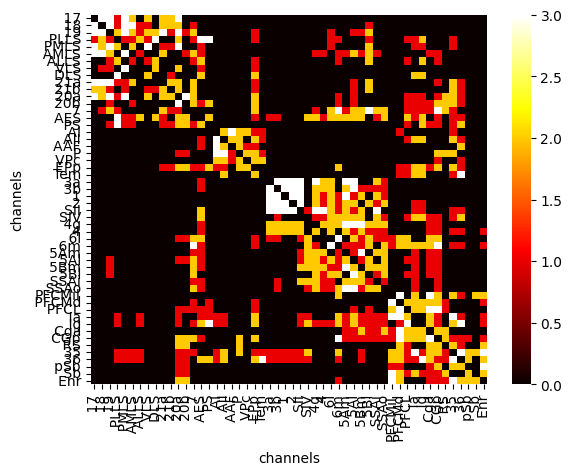

In [16]:
ax= sns. heatmap(cat_df, annot=False, cmap='hot', fmt='2.f',
                xticklabels=cat_df.columns, yticklabels=cat_df.index)
ax.set(xlabel='channels',ylabel='channels')
plt.show()

(array([1886.,  389.,  319.,  110.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

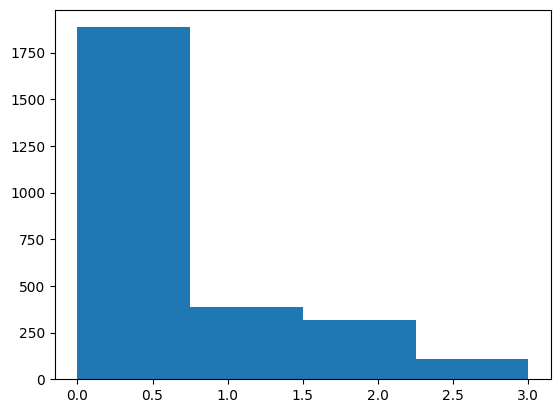

In [40]:
plt.hist(cat_df.to_numpy().flatten(),bins=4)

Porcentaje de 0: 0.6974852071005917 Porcentaje0.75: 0.14386094674556213 Porcentaje de 1.5: 0.1179733727810651 Porcentaje de 2.25: 0.040680473372781065


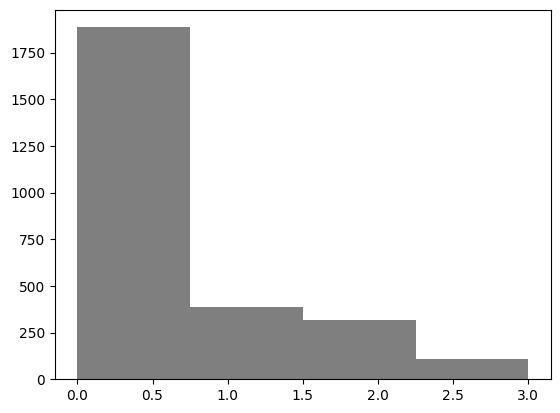

In [45]:
porcentaje0=plt.hist(cat_df.to_numpy().flatten(),bins=4)[0][0]/sum(plt.hist(cat_df.to_numpy().flatten(),bins=4)[0])
porcentaje1=plt.hist(cat_df.to_numpy().flatten(),bins=4)[0][1]/sum(plt.hist(cat_df.to_numpy().flatten(),bins=4)[0])
porcentaje2=plt.hist(cat_df.to_numpy().flatten(),bins=4)[0][2]/sum(plt.hist(cat_df.to_numpy().flatten(),bins=4)[0])
porcentaje3=plt.hist(cat_df.to_numpy().flatten(),bins=4)[0][3]/sum(plt.hist(cat_df.to_numpy().flatten(),bins=4)[0])
print('Porcentaje de 0:',porcentaje0,'Porcentaje0.75:',porcentaje1,'Porcentaje de 1.5:',porcentaje2,'Porcentaje de 2.25:',porcentaje3)

In [53]:
filt1=cat_df[cat_df<1]
filt2=cat_df[cat_df<2]
filt3=cat_df[cat_df<3]


In [54]:
print('Porcentaje eliminado de filtrado 1:',{(filt1.isna().sum().sum())/(52*52)},
'Porcentaje eliminado de filtrado 2:',{(filt2.isna().sum().sum())/(52*52)},
'Porcentaje eliminado de filtrado 3:',{(filt3.isna().sum().sum())/(52*52)})

Porcentaje eliminado de filtrado 1: {np.float64(0.3025147928994083)} Porcentaje eliminado de filtrado 2: {np.float64(0.15865384615384615)} Porcentaje eliminado de filtrado 3: {np.float64(0.040680473372781065)}


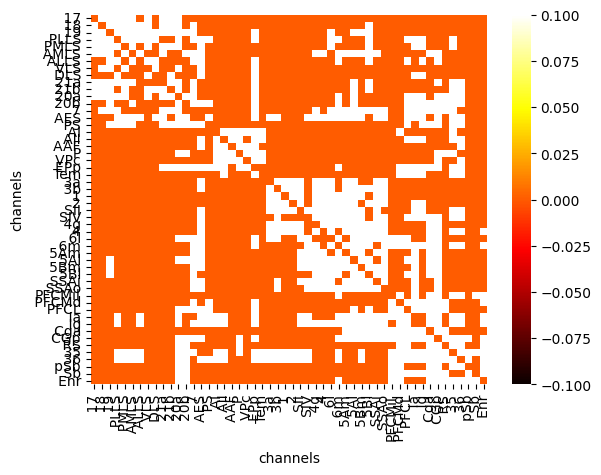

In [55]:
ax= sns. heatmap(filt1, annot=False, cmap='hot', fmt='2.f',
                xticklabels=filt1.columns, yticklabels=filt1.index)
ax.set(xlabel='channels',ylabel='channels')
plt.show()

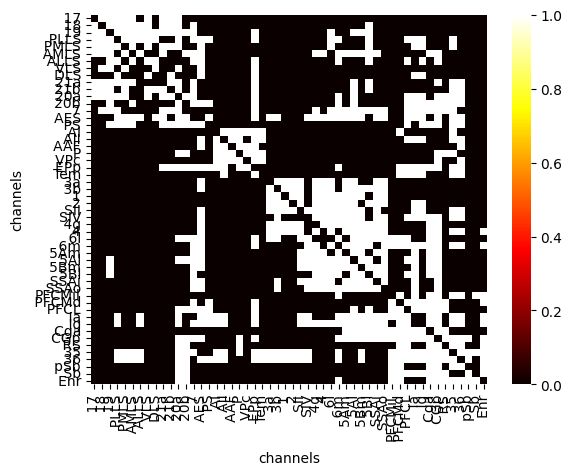

In [56]:
ax= sns. heatmap(filt2, annot=False, cmap='hot', fmt='2.f',
                xticklabels=filt2.columns, yticklabels=filt2.index)
ax.set(xlabel='channels',ylabel='channels')
plt.show()

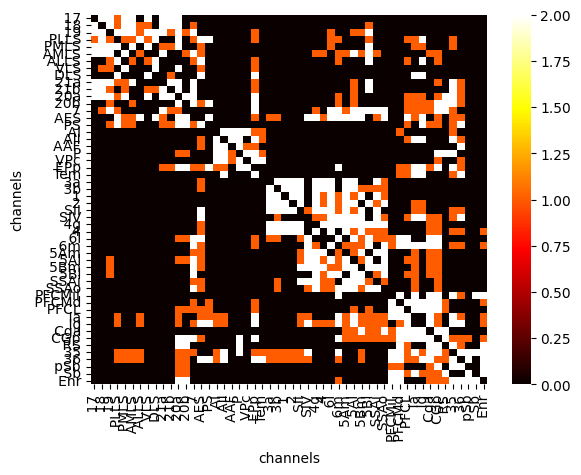

In [57]:
ax= sns. heatmap(filt3, annot=False, cmap='hot', fmt='2.f',
                xticklabels=filt3.columns, yticklabels=filt3.index)
ax.set(xlabel='channels',ylabel='channels')
plt.show()

StopIteration: 

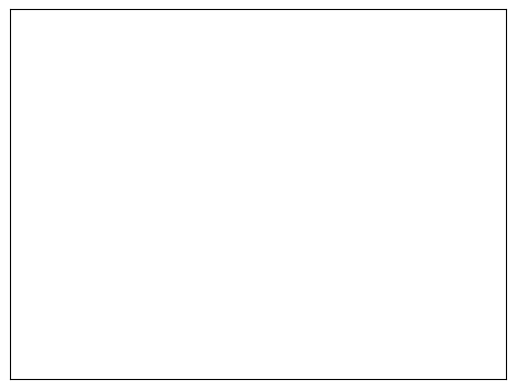

In [59]:
G1=nx.from_pandas_adjacency(filt1,create_using=nx.DiGraph())
nx.draw_networkx(G1)